In [1]:
import requests
from pathlib import Path
import multiprocessing as mp
from itertools import product
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import mne
import numpy as np

save_root = Path("/home/paulo/Documents/datasets")

# def download(url, save_filepath):
#     r = requests.get(url, allow_redirects=True)
#     open(save_filepath, 'wb').write(r.content)

def download(url, save_filepath):
    if save_filepath.exists():
        return

    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(save_filepath, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192 * 16): 
                # If you have chunk encoded response uncomment if
                # and set chunk_size parameter to None.
                #if chunk: 
                f.write(chunk)

def download_parallel(urls, save_filepaths, n_jobs=4):
    args = [(url, fpath) for url, fpath in zip(urls, save_filepaths)]
    with mp.Pool(n_jobs) as pool:
        pool.starmap(download, args)
# https://ftp.cngb.org/pub/gigadb/pub/10.5524/100001_101000/100542/session2/s9/sess02_subj09_EEG_MI.mat
base_url = "https://ftp.cngb.org/pub/gigadb/pub/10.5524/100001_101000/100542/session{}/s{}/sess0{}_subj{}_EEG_MI.mat"

In [4]:


dataset_folder = save_root / "OpenBMI"
dataset_folder.mkdir(exist_ok=True)

urls = list()
for session, sub in product([1, 2], range(1, 54 + 1)):
    url = base_url.format(
        session,
        sub,
        session,
        str(sub).rjust(2, "0")
    )
    urls.append(url)



In [3]:
print("\n".join(urls))

https://ftp.cngb.org/pub/gigadb/pub/10.5524/100001_101000/100542/session1/s1/sess01_subj01_EEG_MI.mat
https://ftp.cngb.org/pub/gigadb/pub/10.5524/100001_101000/100542/session1/s2/sess01_subj02_EEG_MI.mat
https://ftp.cngb.org/pub/gigadb/pub/10.5524/100001_101000/100542/session1/s3/sess01_subj03_EEG_MI.mat
https://ftp.cngb.org/pub/gigadb/pub/10.5524/100001_101000/100542/session1/s4/sess01_subj04_EEG_MI.mat
https://ftp.cngb.org/pub/gigadb/pub/10.5524/100001_101000/100542/session1/s5/sess01_subj05_EEG_MI.mat
https://ftp.cngb.org/pub/gigadb/pub/10.5524/100001_101000/100542/session1/s6/sess01_subj06_EEG_MI.mat
https://ftp.cngb.org/pub/gigadb/pub/10.5524/100001_101000/100542/session1/s7/sess01_subj07_EEG_MI.mat
https://ftp.cngb.org/pub/gigadb/pub/10.5524/100001_101000/100542/session1/s8/sess01_subj08_EEG_MI.mat
https://ftp.cngb.org/pub/gigadb/pub/10.5524/100001_101000/100542/session1/s9/sess01_subj09_EEG_MI.mat
https://ftp.cngb.org/pub/gigadb/pub/10.5524/100001_101000/100542/session1/s10/sess

In [2]:
def mat_to_dict(mat_struct):
    mat_data = mat_struct[0][0]
    info = list(mat_struct.dtype.names)
    data_dict = {
        name: array
        for name, array
        in zip(info, mat_data)
    }

    data_dict["chan"] = [str(ch[0]) for ch in data_dict["chan"].flatten()]
    data_dict["fs"] = data_dict["fs"][0, 0]
    data_dict["t"] = data_dict["t"].flatten()
    return data_dict


In [5]:
filepath = Path("/home/paulo/Documents/datasets/OpenBMI/sess01_subj01_EEG_MI.mat")
mat = loadmat(filepath)

In [15]:

data_dict = mat_to_dict(mat["EEG_MI_train"])
test_data_dict = mat_to_dict(mat["EEG_MI_train"])

# subjects were instructed to gaze at the center
# point of the monitor without a particular task for one minute
# in order to record the resting state EEG data before and after
# each experimental task.
data_dict.keys(), test_data_dict.keys()


(dict_keys(['smt', 'x', 't', 'fs', 'y_dec', 'y_logic', 'y_class', 'class', 'chan', 'ival', 'time_interval', 'EMG', 'EMG_index', 'pre_rest', 'post_rest', 'rest_interval']),
 dict_keys(['smt', 'x', 't', 'fs', 'y_dec', 'y_logic', 'y_class', 'class', 'chan', 'ival', 'time_interval', 'EMG', 'EMG_index', 'pre_rest', 'post_rest', 'rest_interval']))

In [21]:
for k, v in data_dict.items():
    if isinstance(v, np.ndarray):
        s = v.shape
    elif isinstance(v, np.uint16):
        s = v
    else:
        s = len(v)
    print(k, s)

smt (4000, 100, 62)
x (1418040, 62)
t (100,)
fs 1000
y_dec (1, 100)
y_logic (2, 100)
y_class (1, 100)
class (2, 2)
chan 62
ival (1, 4000)
time_interval (1, 2)
EMG (1418040, 4)
EMG_index (1, 4)
pre_rest (60000, 62)
post_rest (60000, 62)
rest_interval (1, 2)


In [22]:
mat["EEG_MI_test"][0][0]

(array([[[-1.15300003e+02, -2.97600006e+02, -4.80000000e+01, ...,
         -4.60999985e+01,  2.42000008e+01,  4.37000008e+01],
        [-2.25800003e+02, -3.34399994e+02, -1.54600006e+02, ...,
         -2.27100006e+02, -5.30000000e+01, -2.73999996e+01],
        [-1.13800003e+02, -1.44199997e+02, -8.04000015e+01, ...,
         -6.48000031e+01, -1.10000002e+00,  8.39999962e+00],
        ...,
        [-6.84000015e+01, -5.87999992e+01,  6.00000024e-01, ...,
         -8.48000031e+01,  1.67000008e+01,  3.72999992e+01],
        [ 2.25300003e+02,  2.34899994e+02,  6.79000015e+01, ...,
          2.01000000e+02,  3.59000015e+01,  4.70000000e+01],
        [-1.90899994e+02, -1.21900002e+02, -6.90000000e+01, ...,
         -9.53000031e+01,  4.67999992e+01,  6.14000015e+01]],

       [[-1.09800003e+02, -2.92299988e+02, -4.87000008e+01, ...,
         -4.54000015e+01,  2.71000004e+01,  4.80999985e+01],
        [-2.25899994e+02, -3.23000000e+02, -1.53000000e+02, ...,
         -2.22000000e+02, -5.62000008

In [23]:
data_dict["class"]

array([[array(['1'], dtype='<U1'), array(['right'], dtype='<U5')],
       [array(['2'], dtype='<U1'), array(['left'], dtype='<U4')]],
      dtype=object)

In [24]:
# 0 - right
# 1 - left
data_dict["y_logic"]

array([[1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
        0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]], dtype=uint8)

In [25]:

# Definition of channel types and names.
ch_names = data_dict["chan"]
n_channels = len(ch_names)
ch_types = ["eeg"] * n_channels

sfreq = data_dict["fs"]
data = data_dict["x"].T * 1e-6

info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

# Numpy array of size  channels x times
raw = mne.io.RawArray(data, info)

# Scaling of the figure.
# For actual EEG/MEG data different scaling factors should be used.
# scalings = {'eeg': 1e6}

# It is also possible to auto-compute scalings
# scalings = 'auto'  # Could also pass a dictionary with some value == 'auto'


Creating RawArray with float64 data, n_channels=62, n_times=1418040
    Range : 0 ... 1418039 =      0.000 ...  1418.039 secs
Ready.


In [26]:
n_events = len(data_dict["t"])
events = np.zeros((n_events, 3))
events[:, 0] = data_dict["t"]
events[:, 2] = data_dict["y_logic"][0]
events = events.astype(np.uint64)

epochs = mne.Epochs(
    raw,
    events,
    event_repeated="drop",
#     reject_by_annotation=True,
    tmin=-2,
    tmax=6,
    reject=None,
    baseline=None,
    # proj=False
)

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated


In [27]:
epochs_data = epochs.get_data()
epochs_data.shape

Using data from preloaded Raw for 100 events and 8001 original time points ...
0 bad epochs dropped


(100, 62, 8001)

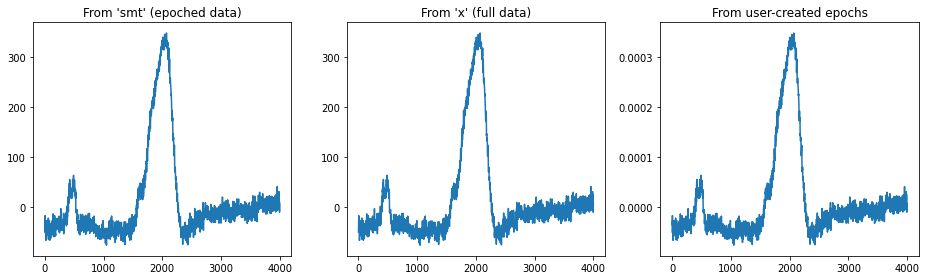

In [28]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 4))
ax1.plot(data_dict["smt"][:, 0, 0])
ax2.plot(data_dict["x"][198717:198717 + 4000, 0])
ax3.plot(epochs_data[0, 0, 2000:6000])

ax1.set_title("From 'smt' (epoched data)")
ax2.set_title("From 'x' (full data)")
ax3.set_title("From user-created epochs")

plt.tight_layout()
plt.show()


In [4]:
import shutil

# raw.export("raw.edf")

In [ ]:
!ls -lha raw.edf

In [ ]:
shutil.rmtree("raw.edf")

In [29]:
del raw, epochs

In [3]:
def mat_dict_to_raw(mat_dict, labels, **info_kwargs):
    # Definition of channel types and names.
    ch_names = mat_dict["chan"]
    n_channels = len(ch_names)
    ch_types = ["eeg"] * n_channels

    sfreq = mat_dict["fs"]
    data = mat_dict["x"].T * 1e-6

    info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
    
    # [TODO] Check if changing info highpass/lowpass alters the data from raw.get_data
    with info._unlock():
        info.update(**info_kwargs)
    # Numpy array of size  channels x times
    raw = mne.io.RawArray(data, info)
    
    n_events = len(mat_dict["t"])
    events = np.zeros((n_events, 3))
    events[:, 0] = mat_dict["t"]
    events[:, 2] = labels
    events = events.astype(np.uint64)
    
    annotations = mne.annotations_from_events(events, sfreq)
    raw = raw.set_annotations(annotations)
    # Scaling of the figure.
    # For actual EEG/MEG data different scaling factors should be used.
    # scalings = {'eeg': 1e6}

    # It is also possible to auto-compute scalings
    # scalings = 'auto'  # Could also pass a dictionary with some value == 'auto'

    return raw

def raw_to_epochs(raw, tmin=-2, tmax=6):

    events, _ = mne.events_from_annotations(raw)
    epochs = mne.Epochs(
        raw,
        events,
        event_repeated="drop",
        tmin=-2,
        tmax=6,
        reject=None,
        baseline=None,
    )

def load_mat_as_raw(input_filepath):
    
    mat = loadmat(input_filepath)
    
    train_data_dict = mat_to_dict(mat["EEG_MI_train"])
    test_data_dict = mat_to_dict(mat["EEG_MI_test"])
    
    # Filter valus from paper
    train_raw = mat_dict_to_raw(train_data_dict, train_data_dict["y_logic"][0], lowpass=40., highpass=.5)
    test_raw = mat_dict_to_raw(test_data_dict, test_data_dict["y_logic"][1], lowpass=40., highpass=.5)
    
    return train_raw, test_raw

def load_mat_as_epochs(input_filepath, **epochs_kwargs):
    train_raw, test_raw = load_mat_as_raw(input_filepath)
    train_epochs = raw_to_epochs(train_raw, **epochs_kwargs)
    test_epochs = raw_to_epochs(test_raw, **epochs_kwargs)
    return train_epochs, test_epochs

def mat_to_edf(input_filepath, output_filepaths, overwrite=False):
    assert len(output_filepaths) == 2
    
    train_output_filepath, test_output_filepath = output_filepaths
    
    train_raw, test_raw = load_mat_as_raw(input_filepath)
    train_raw.export(train_output_filepath, overwrite=overwrite)
    test_raw.export(test_output_filepath, overwrite=overwrite)
    

In [6]:
filepath = Path("/home/paulo/Documents/datasets/OpenBMI/sess01_subj01_EEG_MI.mat")

mat_to_edf(filepath, ("sample_train.edf", "sample_test.edf"))

Creating RawArray with float64 data, n_channels=62, n_times=1418040
    Range : 0 ... 1418039 =      0.000 ...  1418.039 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1418040
    Range : 0 ... 1418039 =      0.000 ...  1418.039 secs
Ready.


/tmp/ipykernel_281602/2259024578.py:69: RuntimeWarning: EDF format requires equal-length data blocks, so 0.96 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath)
/tmp/ipykernel_281602/2259024578.py:70: RuntimeWarning: EDF format requires equal-length data blocks, so 0.96 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath)


In [7]:
edf = mne.io.read_raw_edf("sample_train.edf")
edf

Extracting EDF parameters from /home/paulo/Documents/GIT/BCI_MsC/notebooks/sample_train.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<RawEDF | sample_train.edf, 62 x 1419000 (1419.0 s), ~63 kB, data not loaded>

In [4]:
path = Path("/home/paulo/Documents/datasets/OpenBMI/")
edf_path = path / "edf"
edf_path.mkdir(exist_ok=True)

session1_path = edf_path / "session1"
session2_path = edf_path / "session2"

session1_path.mkdir(exist_ok=True)
session2_path.mkdir(exist_ok=True)
uids = list()
# for filepath in [Path("/home/paulo/Documents/datasets/OpenBMI/sess01_subj18_EEG_MI.mat")]:#path.glob("*.mat"):
for filepath in path.glob("*.mat"):

    if not filepath.name.startswith("sess"):
        continue
    session = int(filepath.name.split("_")[0][-2:])
    uid = int(filepath.name.split("_")[1][-2:])
    
    session_path = session1_path if session == 1 else session2_path

    output_filepaths = (session_path / f"{uid}_train.edf", session_path / f"{uid}_test.edf",)
    print("Writing to", output_filepaths)
    mat_to_edf(filepath, output_filepaths, overwrite=True)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/51_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/51_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1434680
    Range : 0 ... 1434679 =      0.000 ...  1434.679 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1579480
    Range : 0 ... 1579479 =      0.000 ...  1579.479 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.32 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.52 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/31_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/31_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1359160
    Range : 0 ... 1359159 =      0.000 ...  1359.159 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1613320
    Range : 0 ... 1613319 =      0.000 ...  1613.319 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.84 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.68 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/14_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/14_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1443360
    Range : 0 ... 1443359 =      0.000 ...  1443.359 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1602720
    Range : 0 ... 1602719 =      0.000 ...  1602.719 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.64 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.28 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/10_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/10_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1474280
    Range : 0 ... 1474279 =      0.000 ...  1474.279 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1626560
    Range : 0 ... 1626559 =      0.000 ...  1626.559 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.72 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.44 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/35_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/35_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1349880
    Range : 0 ... 1349879 =      0.000 ...  1349.879 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1561080
    Range : 0 ... 1561079 =      0.000 ...  1561.079 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.12 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.92 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/47_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/47_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1347000
    Range : 0 ... 1346999 =      0.000 ...  1346.999 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1545880
    Range : 0 ... 1545879 =      0.000 ...  1545.879 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.12 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/50_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/50_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1403840
    Range : 0 ... 1403839 =      0.000 ...  1403.839 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1553560
    Range : 0 ... 1553559 =      0.000 ...  1553.559 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.16 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.44 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/26_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/26_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1525600
    Range : 0 ... 1525599 =      0.000 ...  1525.599 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1569600
    Range : 0 ... 1569599 =      0.000 ...  1569.599 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.4 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.4 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/19_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/19_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1354080
    Range : 0 ... 1354079 =      0.000 ...  1354.079 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1546720
    Range : 0 ... 1546719 =      0.000 ...  1546.719 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.92 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.28 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/22_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/22_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1344080
    Range : 0 ... 1344079 =      0.000 ...  1344.079 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1532720
    Range : 0 ... 1532719 =      0.000 ...  1532.719 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.92 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.28 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/25_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/25_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1349360
    Range : 0 ... 1349359 =      0.000 ...  1349.359 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1545080
    Range : 0 ... 1545079 =      0.000 ...  1545.079 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.64 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.92 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/7_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/7_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1386640
    Range : 0 ... 1386639 =      0.000 ...  1386.639 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1603640
    Range : 0 ... 1603639 =      0.000 ...  1603.639 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.36 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.36 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/39_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/39_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1446320
    Range : 0 ... 1446319 =      0.000 ...  1446.319 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1654160
    Range : 0 ... 1654159 =      0.000 ...  1654.159 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.68 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.84 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/43_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/43_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1582800
    Range : 0 ... 1582799 =      0.000 ...  1582.799 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1669600
    Range : 0 ... 1669599 =      0.000 ...  1669.599 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.2 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.4 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/5_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/5_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1430040
    Range : 0 ... 1430039 =      0.000 ...  1430.039 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1618440
    Range : 0 ... 1618439 =      0.000 ...  1618.439 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.96 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.56 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/54_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/54_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1544920
    Range : 0 ... 1544919 =      0.000 ...  1544.919 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1751840
    Range : 0 ... 1751839 =      0.000 ...  1751.839 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.08 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.16 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/51_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/51_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1470520
    Range : 0 ... 1470519 =      0.000 ...  1470.519 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1622040
    Range : 0 ... 1622039 =      0.000 ...  1622.039 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.48 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.96 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/36_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/36_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1349760
    Range : 0 ... 1349759 =      0.000 ...  1349.759 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1544120
    Range : 0 ... 1544119 =      0.000 ...  1544.119 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.24 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.88 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/17_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/17_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1580080
    Range : 0 ... 1580079 =      0.000 ...  1580.079 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1622560
    Range : 0 ... 1622559 =      0.000 ...  1622.559 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.92 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.44 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/5_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/5_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1424680
    Range : 0 ... 1424679 =      0.000 ...  1424.679 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1614440
    Range : 0 ... 1614439 =      0.000 ...  1614.439 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.32 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.56 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/37_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/37_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1445920
    Range : 0 ... 1445919 =      0.000 ...  1445.919 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1598080
    Range : 0 ... 1598079 =      0.000 ...  1598.079 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.08 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.92 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/20_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/20_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1459120
    Range : 0 ... 1459119 =      0.000 ...  1459.119 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1608640
    Range : 0 ... 1608639 =      0.000 ...  1608.639 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.88 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.36 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/34_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/34_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1375880
    Range : 0 ... 1375879 =      0.000 ...  1375.879 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1546200
    Range : 0 ... 1546199 =      0.000 ...  1546.199 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.12 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.8 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/52_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/52_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1356880
    Range : 0 ... 1356879 =      0.000 ...  1356.879 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1579000
    Range : 0 ... 1578999 =      0.000 ...  1578.999 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.12 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/11_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/11_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1353360
    Range : 0 ... 1353359 =      0.000 ...  1353.359 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1574480
    Range : 0 ... 1574479 =      0.000 ...  1574.479 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.64 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.52 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/18_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/18_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1367000
    Range : 0 ... 1366999 =      0.000 ...  1366.999 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1573240
    Range : 0 ... 1573239 =      0.000 ...  1573.239 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.76 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/16_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/16_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1341680
    Range : 0 ... 1341679 =      0.000 ...  1341.679 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1582480
    Range : 0 ... 1582479 =      0.000 ...  1582.479 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.32 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.52 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/35_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/35_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1382880
    Range : 0 ... 1382879 =      0.000 ...  1382.879 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1559040
    Range : 0 ... 1559039 =      0.000 ...  1559.039 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.12 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.96 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/14_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/14_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1373880
    Range : 0 ... 1373879 =      0.000 ...  1373.879 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1579560
    Range : 0 ... 1579559 =      0.000 ...  1579.559 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.12 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.44 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/45_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/45_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1788480
    Range : 0 ... 1788479 =      0.000 ...  1788.479 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1672120
    Range : 0 ... 1672119 =      0.000 ...  1672.119 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.52 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.88 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/40_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/40_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1439360
    Range : 0 ... 1439359 =      0.000 ...  1439.359 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1698040
    Range : 0 ... 1698039 =      0.000 ...  1698.039 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.64 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.96 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/30_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/30_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1411760
    Range : 0 ... 1411759 =      0.000 ...  1411.759 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1676640
    Range : 0 ... 1676639 =      0.000 ...  1676.639 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.24 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.36 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/9_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/9_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1362880
    Range : 0 ... 1362879 =      0.000 ...  1362.879 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1540760
    Range : 0 ... 1540759 =      0.000 ...  1540.759 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.12 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.24 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/3_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/3_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1341200
    Range : 0 ... 1341199 =      0.000 ...  1341.199 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1545960
    Range : 0 ... 1545959 =      0.000 ...  1545.959 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.8 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.04 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/53_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/53_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1367400
    Range : 0 ... 1367399 =      0.000 ...  1367.399 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1577040
    Range : 0 ... 1577039 =      0.000 ...  1577.039 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.6 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.96 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/17_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/17_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1404160
    Range : 0 ... 1404159 =      0.000 ...  1404.159 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1636720
    Range : 0 ... 1636719 =      0.000 ...  1636.719 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.84 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.28 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/10_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/10_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1521880
    Range : 0 ... 1521879 =      0.000 ...  1521.879 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1711200
    Range : 0 ... 1711199 =      0.000 ...  1711.199 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.12 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.8 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/20_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/20_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1335600
    Range : 0 ... 1335599 =      0.000 ...  1335.599 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1552120
    Range : 0 ... 1552119 =      0.000 ...  1552.119 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.4 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.88 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/49_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/49_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1382440
    Range : 0 ... 1382439 =      0.000 ...  1382.439 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1563520
    Range : 0 ... 1563519 =      0.000 ...  1563.519 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.56 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.48 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/46_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/46_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1555560
    Range : 0 ... 1555559 =      0.000 ...  1555.559 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1569120
    Range : 0 ... 1569119 =      0.000 ...  1569.119 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.44 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.88 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/27_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/27_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1356560
    Range : 0 ... 1356559 =      0.000 ...  1356.559 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1696360
    Range : 0 ... 1696359 =      0.000 ...  1696.359 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.44 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.64 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/43_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/43_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1337080
    Range : 0 ... 1337079 =      0.000 ...  1337.079 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1560480
    Range : 0 ... 1560479 =      0.000 ...  1560.479 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.92 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.52 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/9_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/9_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1624520
    Range : 0 ... 1624519 =      0.000 ...  1624.519 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1798560
    Range : 0 ... 1798559 =      0.000 ...  1798.559 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.48 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.44 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/24_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/24_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1383320
    Range : 0 ... 1383319 =      0.000 ...  1383.319 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1607320
    Range : 0 ... 1607319 =      0.000 ...  1607.319 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.68 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.68 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/23_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/23_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1381800
    Range : 0 ... 1381799 =      0.000 ...  1381.799 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1564880
    Range : 0 ... 1564879 =      0.000 ...  1564.879 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.2 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.12 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/39_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/39_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1343880
    Range : 0 ... 1343879 =      0.000 ...  1343.879 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1640000
    Range : 0 ... 1639999 =      0.000 ...  1639.999 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.12 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/47_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/47_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1365040
    Range : 0 ... 1365039 =      0.000 ...  1365.039 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1895800
    Range : 0 ... 1895799 =      0.000 ...  1895.799 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.96 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.2 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/52_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/52_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1695800
    Range : 0 ... 1695799 =      0.000 ...  1695.799 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1903040
    Range : 0 ... 1903039 =      0.000 ...  1903.039 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.2 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.96 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/8_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/8_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1348920
    Range : 0 ... 1348919 =      0.000 ...  1348.919 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1560520
    Range : 0 ... 1560519 =      0.000 ...  1560.519 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.08 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.48 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/6_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/6_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1464560
    Range : 0 ... 1464559 =      0.000 ...  1464.559 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1560320
    Range : 0 ... 1560319 =      0.000 ...  1560.319 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.44 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.68 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/32_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/32_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1458240
    Range : 0 ... 1458239 =      0.000 ...  1458.239 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1674440
    Range : 0 ... 1674439 =      0.000 ...  1674.439 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.76 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.56 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/44_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/44_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1454600
    Range : 0 ... 1454599 =      0.000 ...  1454.599 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1570440
    Range : 0 ... 1570439 =      0.000 ...  1570.439 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.4 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.56 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/29_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/29_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1390320
    Range : 0 ... 1390319 =      0.000 ...  1390.319 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1541320
    Range : 0 ... 1541319 =      0.000 ...  1541.319 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.68 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.68 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/21_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/21_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1408920
    Range : 0 ... 1408919 =      0.000 ...  1408.919 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1629680
    Range : 0 ... 1629679 =      0.000 ...  1629.679 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.08 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.32 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/24_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/24_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1453320
    Range : 0 ... 1453319 =      0.000 ...  1453.319 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1617640
    Range : 0 ... 1617639 =      0.000 ...  1617.639 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.68 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.36 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/21_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/21_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1397200
    Range : 0 ... 1397199 =      0.000 ...  1397.199 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1673640
    Range : 0 ... 1673639 =      0.000 ...  1673.639 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.8 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.36 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/6_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/6_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1394520
    Range : 0 ... 1394519 =      0.000 ...  1394.519 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1698040
    Range : 0 ... 1698039 =      0.000 ...  1698.039 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.48 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.96 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/33_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/33_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1561680
    Range : 0 ... 1561679 =      0.000 ...  1561.679 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1649320
    Range : 0 ... 1649319 =      0.000 ...  1649.319 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.32 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.68 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/15_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/15_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1541400
    Range : 0 ... 1541399 =      0.000 ...  1541.399 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1534720
    Range : 0 ... 1534719 =      0.000 ...  1534.719 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.6 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.28 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/29_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/29_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1353080
    Range : 0 ... 1353079 =      0.000 ...  1353.079 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1660520
    Range : 0 ... 1660519 =      0.000 ...  1660.519 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.92 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.48 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/4_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/4_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1376040
    Range : 0 ... 1376039 =      0.000 ...  1376.039 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1578040
    Range : 0 ... 1578039 =      0.000 ...  1578.039 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.96 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.96 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/46_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/46_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1370600
    Range : 0 ... 1370599 =      0.000 ...  1370.599 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1659080
    Range : 0 ... 1659079 =      0.000 ...  1659.079 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.4 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.92 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/50_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/50_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1777240
    Range : 0 ... 1777239 =      0.000 ...  1777.239 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1573920
    Range : 0 ... 1573919 =      0.000 ...  1573.919 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.76 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.08 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/23_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/23_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1387040
    Range : 0 ... 1387039 =      0.000 ...  1387.039 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1622880
    Range : 0 ... 1622879 =      0.000 ...  1622.879 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.96 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.12 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/28_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/28_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1343520
    Range : 0 ... 1343519 =      0.000 ...  1343.519 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1596080
    Range : 0 ... 1596079 =      0.000 ...  1596.079 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.48 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.92 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/8_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/8_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1421120
    Range : 0 ... 1421119 =      0.000 ...  1421.119 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1773160
    Range : 0 ... 1773159 =      0.000 ...  1773.159 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.88 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.84 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/3_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/3_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1371000
    Range : 0 ... 1370999 =      0.000 ...  1370.999 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1583440
    Range : 0 ... 1583439 =      0.000 ...  1583.439 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.56 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/53_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/53_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1368160
    Range : 0 ... 1368159 =      0.000 ...  1368.159 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1571240
    Range : 0 ... 1571239 =      0.000 ...  1571.239 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.84 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.76 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/32_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/32_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1367760
    Range : 0 ... 1367759 =      0.000 ...  1367.759 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1574880
    Range : 0 ... 1574879 =      0.000 ...  1574.879 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.24 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.12 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/27_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/27_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1347720
    Range : 0 ... 1347719 =      0.000 ...  1347.719 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1532360
    Range : 0 ... 1532359 =      0.000 ...  1532.359 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.28 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.64 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/41_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/41_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1385520
    Range : 0 ... 1385519 =      0.000 ...  1385.519 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1595560
    Range : 0 ... 1595559 =      0.000 ...  1595.559 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.48 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.44 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/33_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/33_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1504520
    Range : 0 ... 1504519 =      0.000 ...  1504.519 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1720120
    Range : 0 ... 1720119 =      0.000 ...  1720.119 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.48 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.88 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/44_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/44_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1346880
    Range : 0 ... 1346879 =      0.000 ...  1346.879 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1603720
    Range : 0 ... 1603719 =      0.000 ...  1603.719 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.12 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.28 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/41_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/41_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1447120
    Range : 0 ... 1447119 =      0.000 ...  1447.119 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1641240
    Range : 0 ... 1641239 =      0.000 ...  1641.239 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.88 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.76 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/26_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/26_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1505000
    Range : 0 ... 1504999 =      0.000 ...  1504.999 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1636400
    Range : 0 ... 1636399 =      0.000 ...  1636.399 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.6 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/22_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/22_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1388600
    Range : 0 ... 1388599 =      0.000 ...  1388.599 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1556360
    Range : 0 ... 1556359 =      0.000 ...  1556.359 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.4 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.64 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/48_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/48_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1337240
    Range : 0 ... 1337239 =      0.000 ...  1337.239 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1561120
    Range : 0 ... 1561119 =      0.000 ...  1561.119 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.76 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.88 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/25_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/25_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1359280
    Range : 0 ... 1359279 =      0.000 ...  1359.279 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1857360
    Range : 0 ... 1857359 =      0.000 ...  1857.359 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.72 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.64 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/4_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/4_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1384720
    Range : 0 ... 1384719 =      0.000 ...  1384.719 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1577480
    Range : 0 ... 1577479 =      0.000 ...  1577.479 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.28 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.52 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/45_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/45_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1370000
    Range : 0 ... 1369999 =      0.000 ...  1369.999 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1815800
    Range : 0 ... 1815799 =      0.000 ...  1815.799 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.2 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/54_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/54_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1400840
    Range : 0 ... 1400839 =      0.000 ...  1400.839 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1584320
    Range : 0 ... 1584319 =      0.000 ...  1584.319 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.16 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.68 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/13_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/13_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1503520
    Range : 0 ... 1503519 =      0.000 ...  1503.519 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1646840
    Range : 0 ... 1646839 =      0.000 ...  1646.839 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.48 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.16 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/16_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/16_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1358000
    Range : 0 ... 1357999 =      0.000 ...  1357.999 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1544520
    Range : 0 ... 1544519 =      0.000 ...  1544.519 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.48 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/12_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/12_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1392280
    Range : 0 ... 1392279 =      0.000 ...  1392.279 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1564040
    Range : 0 ... 1564039 =      0.000 ...  1564.039 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.72 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.96 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/2_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/2_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1434800
    Range : 0 ... 1434799 =      0.000 ...  1434.799 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1768160
    Range : 0 ... 1768159 =      0.000 ...  1768.159 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.2 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.84 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/42_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/42_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1393600
    Range : 0 ... 1393599 =      0.000 ...  1393.599 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1628560
    Range : 0 ... 1628559 =      0.000 ...  1628.559 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.4 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.44 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/18_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/18_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1623120
    Range : 0 ... 1623119 =      0.000 ...  1623.119 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1578720
    Range : 0 ... 1578719 =      0.000 ...  1578.719 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.88 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.28 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/2_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/2_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1373920
    Range : 0 ... 1373919 =      0.000 ...  1373.919 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1710720
    Range : 0 ... 1710719 =      0.000 ...  1710.719 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.08 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.28 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/12_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/12_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1376640
    Range : 0 ... 1376639 =      0.000 ...  1376.639 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1581320
    Range : 0 ... 1581319 =      0.000 ...  1581.319 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.36 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.68 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/31_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/31_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1682240
    Range : 0 ... 1682239 =      0.000 ...  1682.239 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1655240
    Range : 0 ... 1655239 =      0.000 ...  1655.239 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.76 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.76 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/40_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/40_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1452920
    Range : 0 ... 1452919 =      0.000 ...  1452.919 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1592440
    Range : 0 ... 1592439 =      0.000 ...  1592.439 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.08 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.56 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/42_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/42_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1353000
    Range : 0 ... 1352999 =      0.000 ...  1352.999 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1586600
    Range : 0 ... 1586599 =      0.000 ...  1586.599 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.4 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/48_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/48_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1354080
    Range : 0 ... 1354079 =      0.000 ...  1354.079 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1616640
    Range : 0 ... 1616639 =      0.000 ...  1616.639 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.92 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.36 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/1_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/1_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1519160
    Range : 0 ... 1519159 =      0.000 ...  1519.159 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1548480
    Range : 0 ... 1548479 =      0.000 ...  1548.479 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.84 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.52 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/11_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/11_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1653400
    Range : 0 ... 1653399 =      0.000 ...  1653.399 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1608360
    Range : 0 ... 1608359 =      0.000 ...  1608.359 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.6 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.64 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/19_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/19_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1335360
    Range : 0 ... 1335359 =      0.000 ...  1335.359 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1570720
    Range : 0 ... 1570719 =      0.000 ...  1570.719 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.64 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.28 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/1_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/1_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1418040
    Range : 0 ... 1418039 =      0.000 ...  1418.039 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1596520
    Range : 0 ... 1596519 =      0.000 ...  1596.519 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.96 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.48 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/7_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/7_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1420160
    Range : 0 ... 1420159 =      0.000 ...  1420.159 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1616000
    Range : 0 ... 1615999 =      0.000 ...  1615.999 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.84 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/15_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/15_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1450560
    Range : 0 ... 1450559 =      0.000 ...  1450.559 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1676520
    Range : 0 ... 1676519 =      0.000 ...  1676.519 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.44 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.48 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/28_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/28_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1440240
    Range : 0 ... 1440239 =      0.000 ...  1440.239 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1638680
    Range : 0 ... 1638679 =      0.000 ...  1638.679 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.76 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.32 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/49_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/49_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1375840
    Range : 0 ... 1375839 =      0.000 ...  1375.839 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1562040
    Range : 0 ... 1562039 =      0.000 ...  1562.039 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.16 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.96 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/36_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/36_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1378800
    Range : 0 ... 1378799 =      0.000 ...  1378.799 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1564280
    Range : 0 ... 1564279 =      0.000 ...  1564.279 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.2 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.72 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/13_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/13_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1469280
    Range : 0 ... 1469279 =      0.000 ...  1469.279 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1716360
    Range : 0 ... 1716359 =      0.000 ...  1716.359 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.72 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.64 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/37_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/37_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1486720
    Range : 0 ... 1486719 =      0.000 ...  1486.719 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1557240
    Range : 0 ... 1557239 =      0.000 ...  1557.239 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.28 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.76 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/34_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/34_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1591680
    Range : 0 ... 1591679 =      0.000 ...  1591.679 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1616480
    Range : 0 ... 1616479 =      0.000 ...  1616.479 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.32 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.52 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/38_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/38_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1474360
    Range : 0 ... 1474359 =      0.000 ...  1474.359 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1720920
    Range : 0 ... 1720919 =      0.000 ...  1720.919 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.64 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.08 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/38_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session2/38_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1487360
    Range : 0 ... 1487359 =      0.000 ...  1487.359 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1703600
    Range : 0 ... 1703599 =      0.000 ...  1703.599 secs
Ready.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.64 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)


Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.4 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


Writing to (PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/30_train.edf'), PosixPath('/home/paulo/Documents/datasets/OpenBMI/edf/session1/30_test.edf'))
Creating RawArray with float64 data, n_channels=62, n_times=1582560
    Range : 0 ... 1582559 =      0.000 ...  1582.559 secs
Ready.
Creating RawArray with float64 data, n_channels=62, n_times=1678840
    Range : 0 ... 1678839 =      0.000 ...  1678.839 secs
Ready.
Overwriting existing file.
Overwriting existing file.


/tmp/ipykernel_383656/3899056146.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.44 seconds of zeros were appended to all channels when writing the final block.
  train_raw.export(train_output_filepath, overwrite=overwrite)
/tmp/ipykernel_383656/3899056146.py:74: RuntimeWarning: EDF format requires equal-length data blocks, so 0.16 seconds of zeros were appended to all channels when writing the final block.
  test_raw.export(test_output_filepath, overwrite=overwrite)


In [7]:
path = Path("/home/paulo/Documents/datasets/OpenBMI/")
edf_path = path / "edf"
edf_path.mkdir(exist_ok=True)

session1_path = edf_path / "session1"
session2_path = edf_path / "session2"

session1_path.mkdir(exist_ok=True)
session2_path.mkdir(exist_ok=True)

for filepath in path.glob("*.mat"):
    print(filepath)

/home/paulo/Documents/datasets/OpenBMI/sess01_subj51_EEG_MI.mat
/home/paulo/Documents/datasets/OpenBMI/sess02_subj31_EEG_MI.mat
/home/paulo/Documents/datasets/OpenBMI/sess01_subj14_EEG_MI.mat
/home/paulo/Documents/datasets/OpenBMI/sess02_subj10_EEG_MI.mat
/home/paulo/Documents/datasets/OpenBMI/sess01_subj35_EEG_MI.mat
/home/paulo/Documents/datasets/OpenBMI/sess02_subj47_EEG_MI.mat
/home/paulo/Documents/datasets/OpenBMI/sess01_subj50_EEG_MI.mat
/home/paulo/Documents/datasets/OpenBMI/sess02_subj26_EEG_MI.mat
/home/paulo/Documents/datasets/OpenBMI/sess01_subj19_EEG_MI.mat
/home/paulo/Documents/datasets/OpenBMI/sess01_subj22_EEG_MI.mat
/home/paulo/Documents/datasets/OpenBMI/sess01_subj25_EEG_MI.mat
/home/paulo/Documents/datasets/OpenBMI/sess02_subj07_EEG_MI.mat
/home/paulo/Documents/datasets/OpenBMI/sess01_subj39_EEG_MI.mat
/home/paulo/Documents/datasets/OpenBMI/sess01_subj43_EEG_MI.mat
/home/paulo/Documents/datasets/OpenBMI/sess02_subj05_EEG_MI.mat
/home/paulo/Documents/datasets/OpenBMI/s